<a href="https://colab.research.google.com/github/Eng-Noufhmad21/Aramco-AI-Forecasting/blob/main/Aramco_Stock_Trend_Analysis_%26_AI_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
# كود بسيط للحصول علىش بيانات أرامكو  للتحليل
import yfinance as ticker_data

# رمز أرامكو في تداول هو 2222.SR
data = ticker_data.download("2222.SR", start="2023-01-01", end="2024-01-01")


print(data.head())


/tmp/ipython-input-3161099382.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = ticker_data.download("2222.SR", start="2023-01-01", end="2024-01-01")
[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open   Volume
Ticker        2222.SR    2222.SR    2222.SR    2222.SR  2222.SR
Date                                                           
2023-01-01  24.975565  24.975565  24.744311  24.782853  1569087
2023-01-02  24.782854  25.052652  24.782854  25.052652  4693364
2023-01-03  24.782854  24.782854  24.782854  24.782854        0
2023-01-04  24.435972  24.782856  24.320346  24.744314  4618455
2023-01-05  24.320343  24.435969  24.050545  24.435969  4797670


In [17]:
# 1. نأخذ فقط عمود السعر الذي يهمنا
df_cleaned = data[['Close']].copy()

# 2. التحقق من وجود قيم مفقودة (NaN)
missing_values = df_cleaned.isnull().sum()
print("القيم المفقودة في كل عمود:\n", missing_values)

# 3. إذا وجدنا قيم مفقودة، سنقوم بتعبئتها بناءً على السعر السابق (Forward Fill)

df_cleaned.fillna(method='ffill', inplace=True)

# 4. تحويل التاريخ من 'فهرس' إلى 'عمود' عادي
df_cleaned.reset_index(inplace=True)

# 5. عرض النتيجة النهائية
print("\nالبيانات بعد التنظيف والترتيب:")
print(df_cleaned.head())


القيم المفقودة في كل عمود:
 Price  Ticker 
Close  2222.SR    0
dtype: int64

البيانات بعد التنظيف والترتيب:
Price        Date      Close
Ticker               2222.SR
0      2023-01-01  24.975565
1      2023-01-02  24.782854
2      2023-01-03  24.782854
3      2023-01-04  24.435972
4      2023-01-05  24.320343


/tmp/ipython-input-3839924988.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_cleaned.fillna(method='ffill', inplace=True)


In [18]:
# حساب المتوسط، وأعلى سعر، وأدنى سعر
mean_price = df_cleaned['Close'].mean().item()
max_price = df_cleaned['Close'].max() .item()
min_price = df_cleaned['Close'].min() .item()

print(f"متوسط سعر سهم أرامكو: {mean_price:.2f} ريال")
print(f"أعلى سعر وصل له السهم: {max_price:.2f} ريال")
print(f"أدنى سعر وصل له السهم: {min_price:.2f} ريال")


متوسط سعر سهم أرامكو: 27.70 ريال
أعلى سعر وصل له السهم: 30.67 ريال
أدنى سعر وصل له السهم: 23.90 ريال


In [6]:
!pip install arabic-reshaper python-bidi


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.6/300.6 kB 6.7 MB/s eta 0:00:00


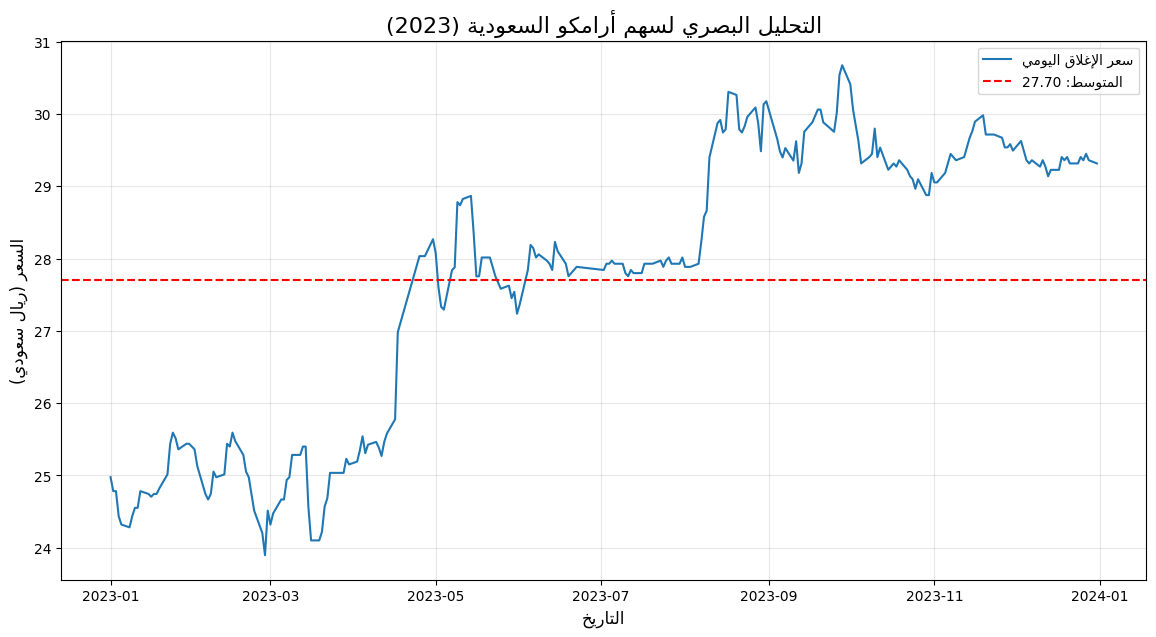

In [19]:
import matplotlib.pyplot as plt
from arabic_reshaper import reshape
from bidi.algorithm import get_display

# دالة صغيرة لتحويل أي نص عربي لشكل صحيح في الرسم
def ar_text(text):
    return get_display(reshape(text))

plt.figure(figsize=(14, 7))

# رسم البيانات
plt.plot(df_cleaned['Date'], df_cleaned['Close'], label=ar_text('سعر الإغلاق اليومي'), color='#1f77b4')
plt.axhline(mean_price, color='red', linestyle='--', label=ar_text(f'المتوسط: {mean_price:.2f}'))

# العناوين باستخدام الدالة الجديدة ar_text
plt.title(ar_text('التحليل البصري لسهم أرامكو السعودية (2023)'), fontsize=16)
plt.xlabel(ar_text('التاريخ'), fontsize=12)
plt.ylabel(ar_text('السعر (ريال سعودي)'), fontsize=12)

plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


In [20]:
import numpy as np
from sklearn.linear_model import LinearRegression

# 1. تحويل التاريخ إلى أرقام تسلسلية (0, 1, 2, 3...) لأن الخوارزمية تحب الأرقام
df_cleaned['Date_Ordinal'] = np.arange(len(df_cleaned))

# 2. تحديد المدخلات (X) والمخرجات (y)
# X هو الوقت (التاريخ الرقمي)
# y هو السعر الذي نريد التنبؤ به
X = df_cleaned[['Date_Ordinal']]
y = df_cleaned['Close']

# 3. إنشاء "نموذج" الذكاء الاصطناعي وتدريبه
model = LinearRegression()
model.fit(X, y)

print("تم تدريب نموذج الذكاء الاصطناعي بنجاح!")


تم تدريب نموذج الذكاء الاصطناعي بنجاح!


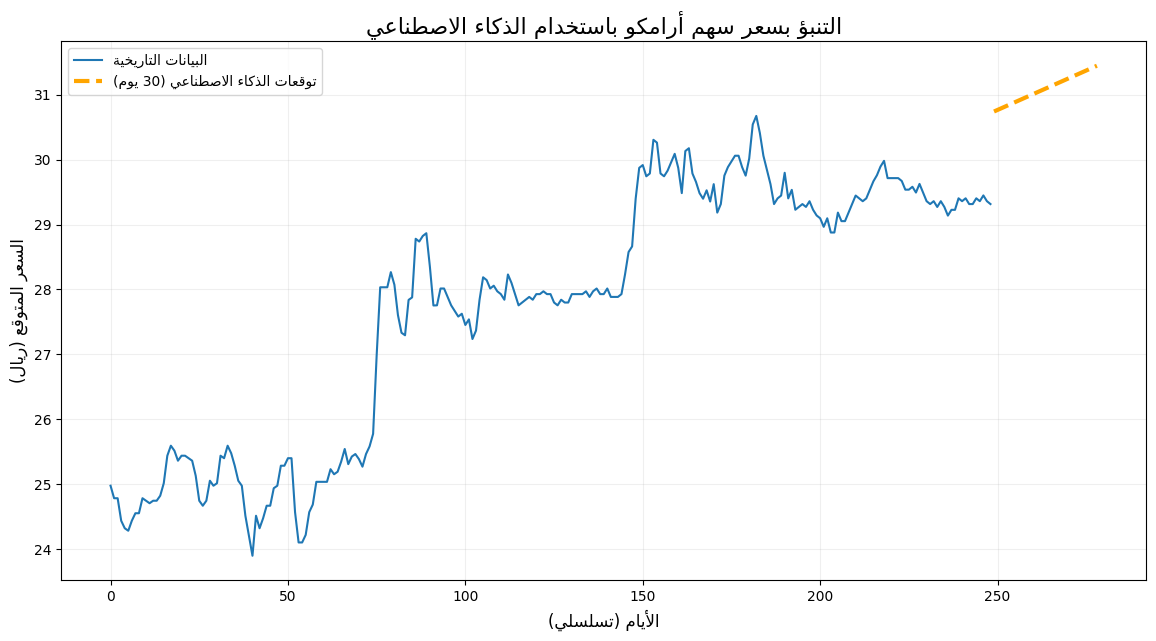

السعر المتوقع لأول يوم تداول قادم: 30.74 ريال


In [21]:
# 1. تجهيز الأيام الـ 30 القادمة (أرقام تسلسلية تبدأ من حيث انتهينا)
last_day = df_cleaned['Date_Ordinal'].max()
future_days = np.arange(last_day + 1, last_day + 31).reshape(-1, 1)

# 2. التنبؤ بالأسعار
future_predictions = model.predict(future_days)

# 3. الرسم البياني للمقارنة بين الماضي والتوقعات
plt.figure(figsize=(14, 7))

# رسم البيانات التاريخية (الماضي)
plt.plot(df_cleaned['Date_Ordinal'], df_cleaned['Close'], label=ar_text('البيانات التاريخية'), color='#1f77b4')

# رسم التوقعات (المستقبل) باللون البرتقالي ومنقط
plt.plot(future_days, future_predictions, label=ar_text('توقعات الذكاء الاصطناعي (30 يوم)'), color='orange', linestyle='--', linewidth=3)

# إضافة العناوين والجماليات
plt.title(ar_text('التنبؤ بسعر سهم أرامكو باستخدام الذكاء الاصطناعي'), fontsize=16)
plt.xlabel(ar_text('الأيام (تسلسلي)'), fontsize=12)
plt.ylabel(ar_text('السعر المتوقع (ريال)'), fontsize=12)
plt.legend()
plt.grid(True, alpha=0.2)
plt.show()

# 4. طباعة توقع أول يوم قادم كمثال
print(f"السعر المتوقع لأول يوم تداول قادم: {future_predictions[0].item():.2f} ريال")


In [22]:
from cryptography.fernet import Fernet

# 1. توليد مفتاح تشفير (هذا هو المفتاح السري )
key = Fernet.generate_key()
cipher_suite = Fernet(key)

# 2. تحويل السعر المتوقع لنص ثم تشفيره
prediction_text = f"{future_predictions[0].item():.2f}".encode()
encrypted_text = cipher_suite.encrypt(prediction_text)

print(f"--- {ar_text('أمن البيانات')} ---")
print(f"السعر المشفر (الذي سيظهر للمخترقين): {encrypted_text.decode()}")

# 3. فك التشفير (فقط عندما نملك المفتاح)
decrypted_text = cipher_suite.decrypt(encrypted_text)
print(f"السعر بعد فك التشفير: {decrypted_text.decode()} ريال")


--- ﺕﺎﻧﺎﻴﺒﻟﺍ ﻦﻣﺃ ---
السعر المشفر (الذي سيظهر للمخترقين): gAAAAABpnDhnPaenPxmpy05ZOOmBrp0C9mG0PGg1CfXpVAMrh_Oz5EuK-bB-seUnrj64-Noxv-ACnufuzXD5XaERlhKCVDgedA==
السعر بعد فك التشفير: 30.74 ريال


In [23]:
from sklearn.metrics import r2_score
import numpy as np

# 1. التأكد من أن البيانات موجودة وجاهزة
#سنستخدم نفس البيانات التي ظهرت في الرسم البياني
X_eval = np.array(range(len(data))).reshape(-1, 1) # الأيام
y_eval = data['Close'].values # الأسعار الحقيقية

# 2. حساب الدقة
accuracy = r2_score(y_eval, model.predict(X_eval))

print(f"✅ تم حساب الدقة بنجاح!")
print(f"📊 دقة النموذج (R2 Score) هي: {accuracy * 100:.2f}%")

if accuracy > 0.70:
    print("🌟 النتيجة ممتازة جداً لمجال الأسهم!")
elif accuracy > 0.50:
    print("👍 النتيجة جيدة وتوضح اتجاه السهم بشكل مقبول.")
else:
    print("🧐 الدقة منخفضة، وهذا طبيعي في الأسهم لأنها متقلبة جداً.")


✅ تم حساب الدقة بنجاح!
📊 دقة النموذج (R2 Score) هي: 80.11%
🌟 النتيجة ممتازة جداً لمجال الأسهم!


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import numpy as np

# 1. تجهيز البيانات من المصدر مباشرة
X_eval = np.array(range(len(data))).reshape(-1, 1)
y_eval = data['Close'].values

# 2. تقسيم البيانات: 80% للتدريب و 20% للاختبار الحقيقي
X_train, X_test, y_train, y_test = train_test_split(X_eval, y_eval, test_size=0.2, random_state=42)

# 3. إعادة تدريب النموذج على قسم التدريب فقط
model.fit(X_train, y_train)

# 4. حساب الدقة على قسم الاختبار (بيانات لم يراها النموذج من قبل)
real_accuracy = r2_score(y_test, model.predict(X_test))

print(f"🎯 الدقة الحقيقية (Test Set Score) هي: {real_accuracy * 100:.2f}%")


🎯 الدقة الحقيقية (Test Set Score) هي: 85.67%
